In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [60]:
data=pd.read_csv(r'F:\AlphaBits_DataScience_Internship\Purva_Kolhe\project2.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 0 Null values

In [62]:
#Missing values count
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [64]:
data.shape

(7043, 21)

In [65]:
#changing data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype("float")
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

##### Get Dummy variable using label Encoding

In [66]:
col=['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
     'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()

In [69]:
for i in col:
    data[i]=le.fit_transform(data[i])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3624,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,536,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,3700,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,6304,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,1265,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,1157,1


In [70]:
data.duplicated()# checking duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

#### Dependent variable is Churn

In [71]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Visualization

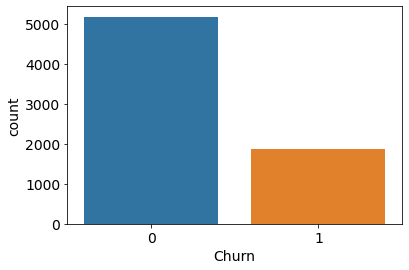

In [72]:
sns.countplot(x='Churn',data=data)
plt.show()

High frequency of No as Churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

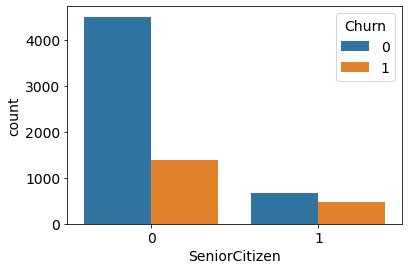

In [73]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)

Senior Citizenship of a customer seems to affect Churn

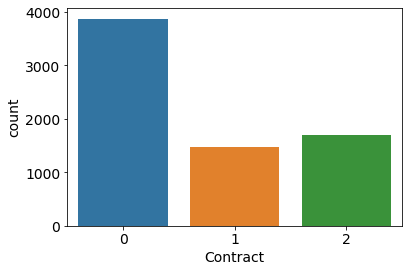

In [74]:
sns.countplot(x='Contract',data=data)
plt.show()

<AxesSubplot:xlabel='InternetService', ylabel='count'>

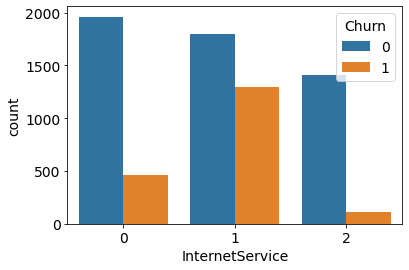

In [75]:
sns.countplot(x='InternetService',hue='Churn',data=data)

Internet Service of a customer seems to affect Churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

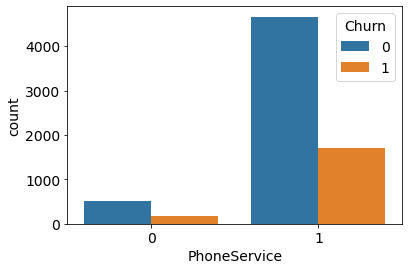

In [76]:
sns.countplot(x='PhoneService',hue='Churn',data=data)

PhoneService seems to affect Churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

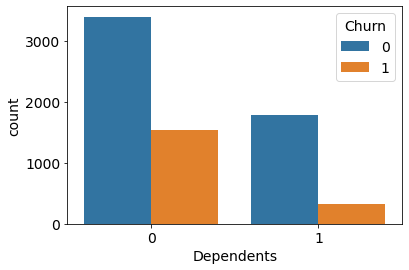

In [77]:
sns.countplot(x='Dependents',hue='Churn',data=data)

Dependent seems to affect Churn

<AxesSubplot:xlabel='Partner', ylabel='count'>

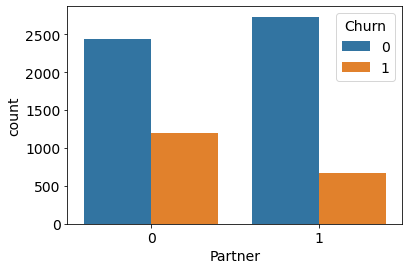

In [78]:
sns.countplot(x='Partner',hue='Churn',data=data)

Partner doesn't seem to affect Churn much

<AxesSubplot:xlabel='gender', ylabel='count'>

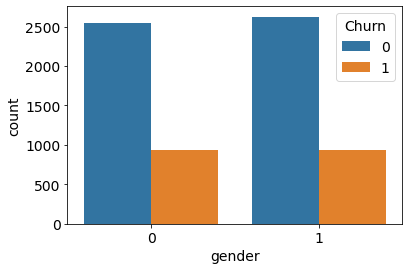

In [79]:
sns.countplot(x="gender",hue='Churn',data=data)

Gender doesn't seem to affect Churn

<AxesSubplot:xlabel='tenure', ylabel='Count'>

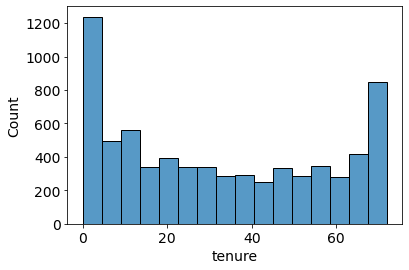

In [80]:
sns.histplot(data=data,x='tenure')

Most customers are towards the extreme tenure value

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

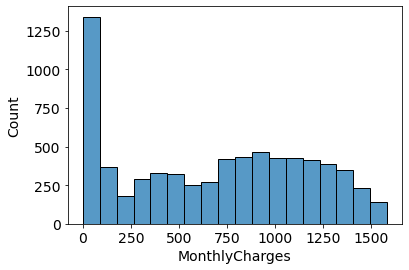

In [81]:
sns.histplot(data=data,x='MonthlyCharges')

Most customers have low Monthly Charges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

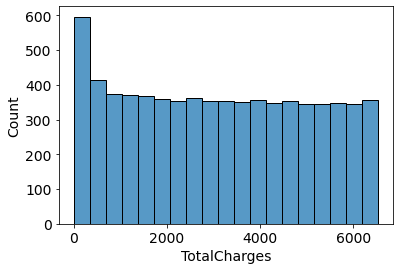

In [82]:
sns.histplot(data=data,x='TotalCharges')

Most of customers have equal charges

In [83]:
data.groupby('Churn').mean()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
0,3542.319869,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.918825,0.893893,0.939505,1.009857,0.998647,0.943371,1.004832,1.012949,0.889254,0.535562,1.505605,630.747971,3377.507538
1,3461.979668,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,1.000535,0.814874,0.376137,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,829.628143,2355.645265


Text(0, 0.5, 'Frequency of churn')

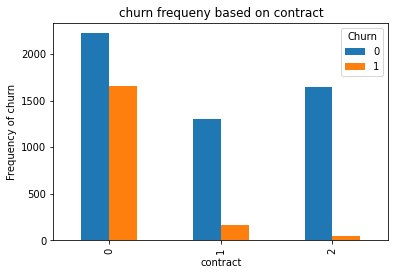

In [84]:
%matplotlib inline
pd.crosstab(data.Contract,data.Churn).plot(kind='bar')
plt.title('churn frequeny based on contract')
plt.xlabel('contract')
plt.ylabel('Frequency of churn')

Seems that Contract affects the Churn

Text(0, 0.5, 'Frequency of PaperlessBilling')

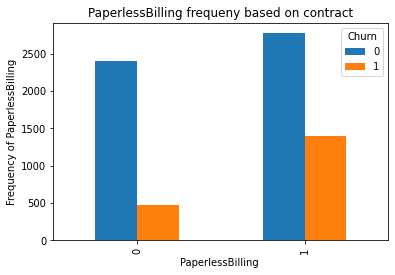

In [85]:
%matplotlib inline
pd.crosstab(data.PaperlessBilling,data.Churn).plot(kind='bar')
plt.title('PaperlessBilling frequeny based on contract')
plt.xlabel('PaperlessBilling ')
plt.ylabel('Frequency of PaperlessBilling')

Paperless Billing doesn't seems to affect Churn much

Text(0, 0.5, 'Frequency of PaymentMethod')

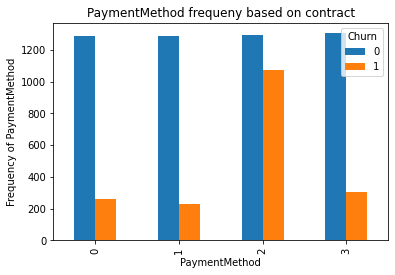

In [86]:
%matplotlib inline
pd.crosstab(data.PaymentMethod,data.Churn).plot(kind='bar')
plt.title('PaymentMethod frequeny based on contract')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency of PaymentMethod')

PaymentMethod doesn't seems to affect Churn much

### Independent Variable

In [87]:
x=data.drop(['Churn'], axis = 1)

In [88]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674


### Dependent Variable

In [89]:
y=data['Churn']

In [90]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [91]:
x_train, x_test , y_train , y_test  = train_test_split(x , y  ,test_size=0.3)

In [92]:
model = LogisticRegression()

In [93]:
model.fit(x_train, y_train)

LogisticRegression()

In [94]:
y_pred = model.predict(x_test)

In [95]:
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score


In [96]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1385  182]
 [ 241  305]]

True Positives(TP) =  1385

True Negatives(TN) =  305

False Positives(FP) =  182

False Negatives(FN) =  241


<AxesSubplot:>

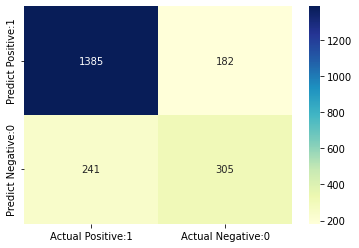

In [97]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [98]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1626
           1       0.56      0.63      0.59       487

    accuracy                           0.80      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.81      0.80      0.80      2113



# Classification accuracy

In [99]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [100]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7998


In [101]:
print(accuracy_score(y_pred , y_test))

0.7998106956933271


# Classification error

In [102]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2002


# Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [103]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8839


# Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [104]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8518


# True Positive Rate
True Positive Rate is synonymous with Recall.

In [105]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8518


# False Positive Rate

In [106]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3737


# Specificity

In [107]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6263


# K-Fold Validation

In [108]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for training set: %.3f" % (results.mean()))

10-fold cross validation average accuracy for training set: 0.800


By using K-Fold validation it also gives us 80% accuracy.

# Interpretation

As we predict model with accuracy 80% so, there is possibility that the customers remains with the company are 80% and  20% customers are going to churn out. Here, we predicted model of telecom churn dataset whose Dependent variable (Y) is 'Churn' and rest of the variables are Independent variable (X), according to accuarcy score our model build well.